In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("data.csv", "r") as file:
    line = file.readline()
    values = [float(v) for v in line.strip().split(",")]

In [3]:
data = np.array(values).reshape(-1, 2)

In [4]:
center = np.mean(data, axis=0)

In [5]:
centered = data - center

In [6]:
U, S, VT = np.linalg.svd(centered)

In [7]:
principal_axes = VT.T

In [8]:
angle_rad = np.arctan2(principal_axes[1, 0], principal_axes[0, 0])

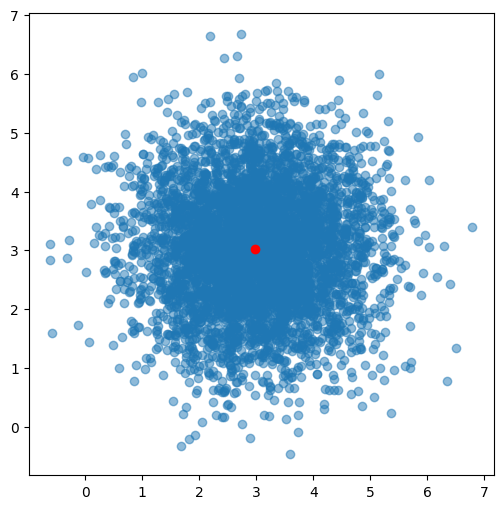

In [9]:
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.scatter(center[0], center[1], color='red', label='Środek')

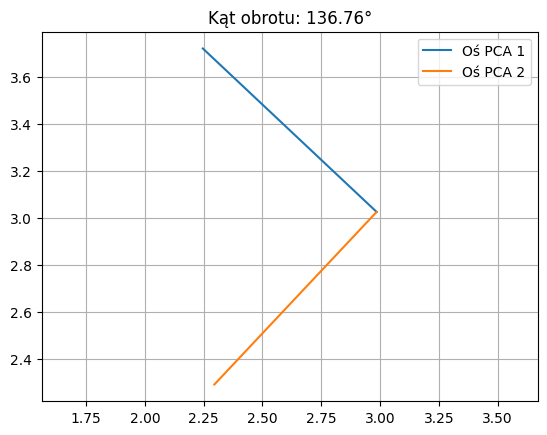

In [10]:
for i in range(2):
    vec = principal_axes[:, i]
    scale = S[i] / np.sqrt(len(data))
    plt.plot(
        [center[0], center[0] + vec[0] * scale],
        [center[1], center[1] + vec[1] * scale],
        label=f'Oś PCA {i+1}'
    )

plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title(f'Kąt obrotu: {np.degrees(angle_rad):.2f}°')
plt.show()